In [1]:
import scipy.io as scio
import numpy as np
import os

In [21]:
from sklearn.metrics import balanced_accuracy_score

data_root = '/data/file/classification_data/SVM数据/T32/'

traindata = scio.loadmat(os.path.join(data_root, 'traindata.mat'))['x_train']
trainlabel = scio.loadmat(os.path.join(data_root, 'trainlabel.mat'))['trainlabel']
testdata = scio.loadmat(os.path.join(data_root, 'testdata'))['x_test']
testlabel = scio.loadmat(os.path.join(data_root, 'testlabel'))['testlabel']

In [13]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(traindata, trainlabel)

/home/roczhang/anaconda3/envs/dataAna/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(max_iter=300, random_state=1)

In [14]:
# 返回给定测试数据和标签的平均精度。
clf.score(testdata, testlabel)

0.6071428571428571

In [22]:
y_pred = clf.predict(testdata)
# 处理不平衡数据集的二分类和多分类问题的平衡精度。它被定义为每个类的平均召回率。
balanced_accuracy_score(y_pred, testlabel)

0.698581560283688

In [23]:
pos_prob =  clf.predict_proba(testdata)[:, 1]

In [16]:
def get_roc(pos_prob,y_true):

    pos = y_true[y_true==1]  # 145
    neg = y_true[y_true==0]  # 855
    # [::-1]逆序切片
    threshold = np.sort(pos_prob)[::-1]  # 按预测为正的概率大小逆序排列
    y = y_true[pos_prob.argsort()[::-1]]

    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))  # 0.0011695906432748538
    y_step = 1/float(len(pos))  # 0.006896551724137931
    y_sum = 0
    for i in range(len(threshold)):  # 1000
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            y_sum += tpr             # fpr加一个样本，y_sum累计。计算面积
    return tpr_all,fpr_all,y_sum*x_step  # 获得总体TPR，FPR和相应的AUC

In [17]:
tpr, fpr, auc = get_roc(pos_prob, testlabel)

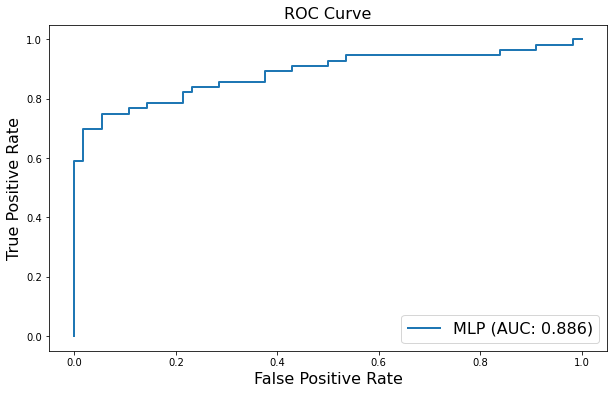

In [19]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="MLP (AUC: {:.3f})".format(auc),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)
plt.show()